Bibliotecas Necessárias:

In [ ]:
!pip install yfinance --upgrade --no-cache-dir. #utilizado para simular o prompt de comando e corrigir bugs cm o Yahoo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web # buscar a fonte de dados
import seaborn as sns # realizar a coorelação e melhorar aspectos gráficos
import yfinance as yf
yf.pdr_override()
!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')




Obtendo e Utilizando Médias Móveis.


[*********************100%***********************]  1 of 1 completed


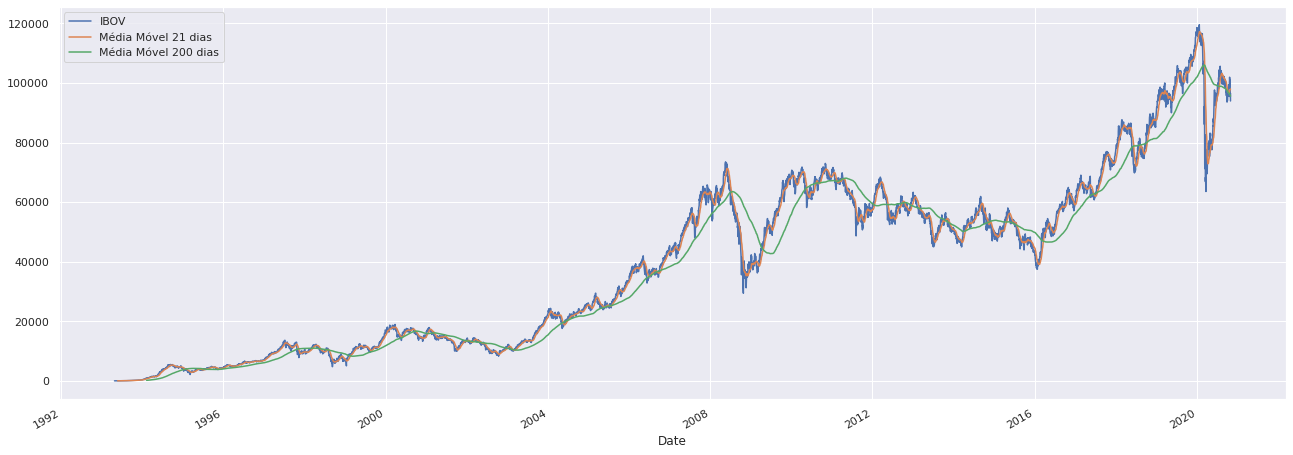

In [ ]:
ibov = web.get_data_yahoo('^BVSP')
ibov.head()
ibov.tail()

# Médias moveis #

# Se torna possível também realizar a média móvel da carteira por completo #

ibov["Close"].plot(figsize=(22,8), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="Média Móvel 21 dias") #Comando de janela móvel(rolling) agregado do mean(média)
ibov["Close"].rolling(200).mean().plot(label="Média Móvel 200 dias")
sns.set()
plt.legend();


# Filtrar por um fatiamento de periodo: #

##ibov_fatiado = ibov[ibov.index.year == 2012]
##ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
##ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
##ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
##sns.set()
##plt.legend();

# Podemos também filtrar por uma tabela com informações semelhante ao Yahoo Finances:

##ibov_fatiado = ibov[ibov.index.day == 14]
##ibov_fatiado.tail(50)




Visualização em Gráficos

[*********************100%***********************]  5 of 5 completed


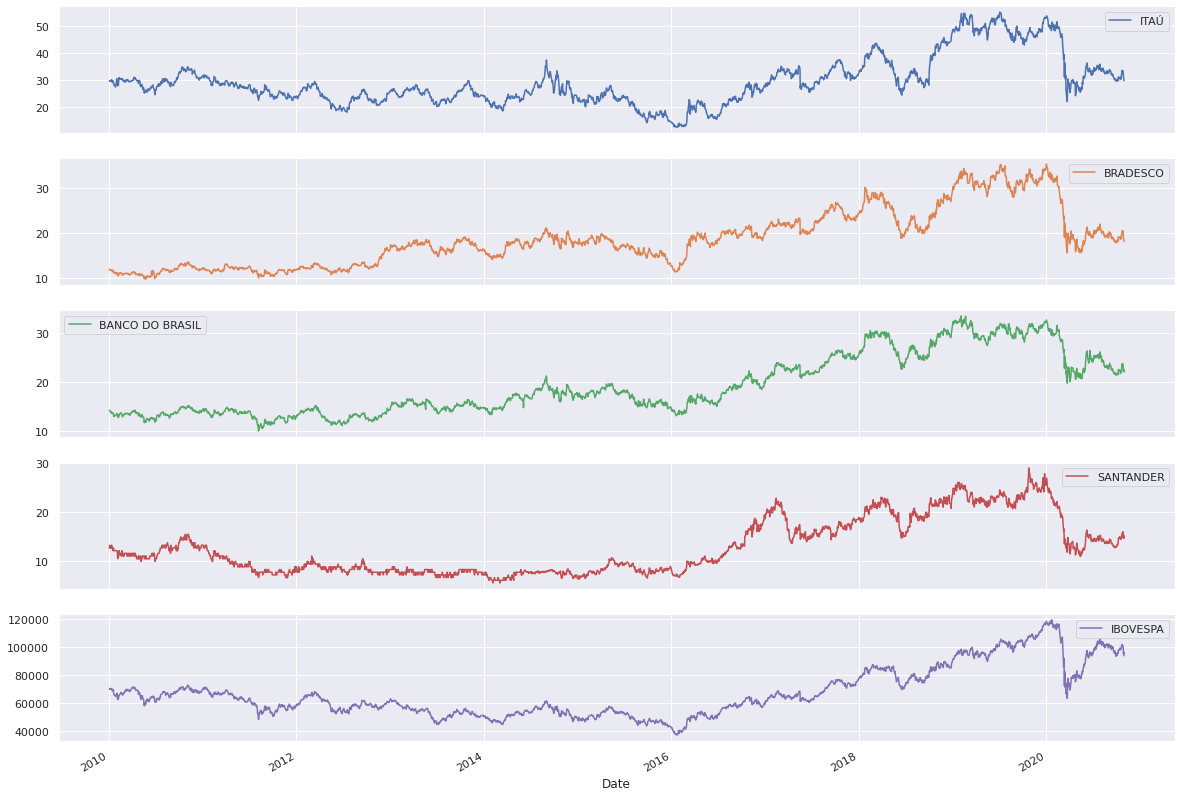

In [ ]:
# Agora estamos passando uma lista com um filtro de dados de Close(fechamento)
tickers = ['ITUB3.SA', 'BBDC3.SA', 'BBAS3.SA', 'SANB3.SA', '^BVSP']
portfolio = web.get_data_yahoo(tickers,start="2010-01-01")['Close'] # Agora estamos passando uma lista com um filtro de dados de Close(fechamento)

portfolio.columns = ["ITAÚ", "BRADESCO","BANCO DO BRASIL","SANTANDER","IBOVESPA"]

portfolio = portfolio.dropna() # Apenas para retirar algum possível dado faltantes

sns.set()
portfolio.plot(subplots=True, figsize=(20,15)); #subplots = True para unificar a escala em gráficos separados.

portfolio = portfolio.dropna() # Apenas para retirar algum possível dado faltante









Análise de Correlação

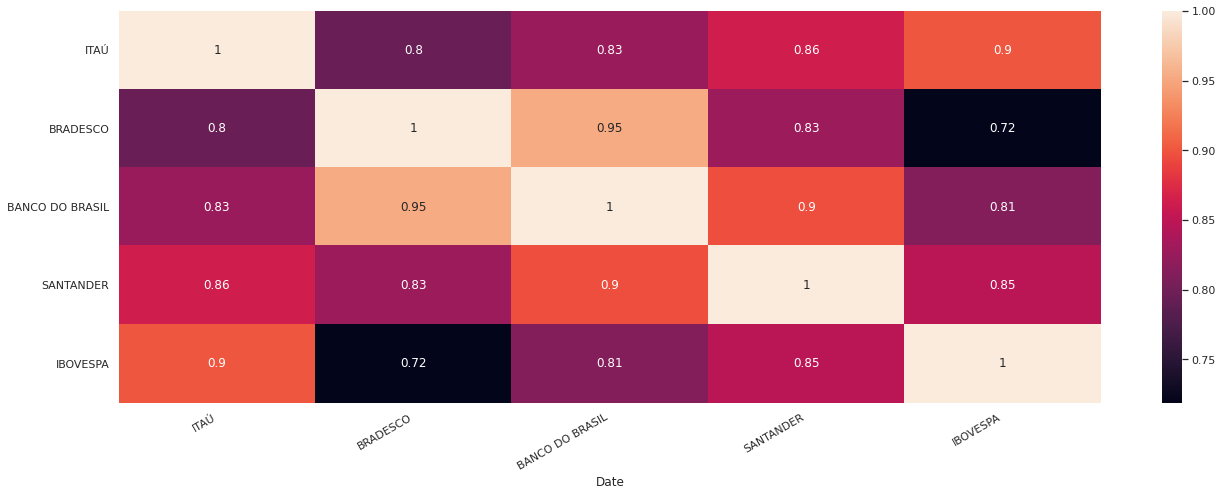

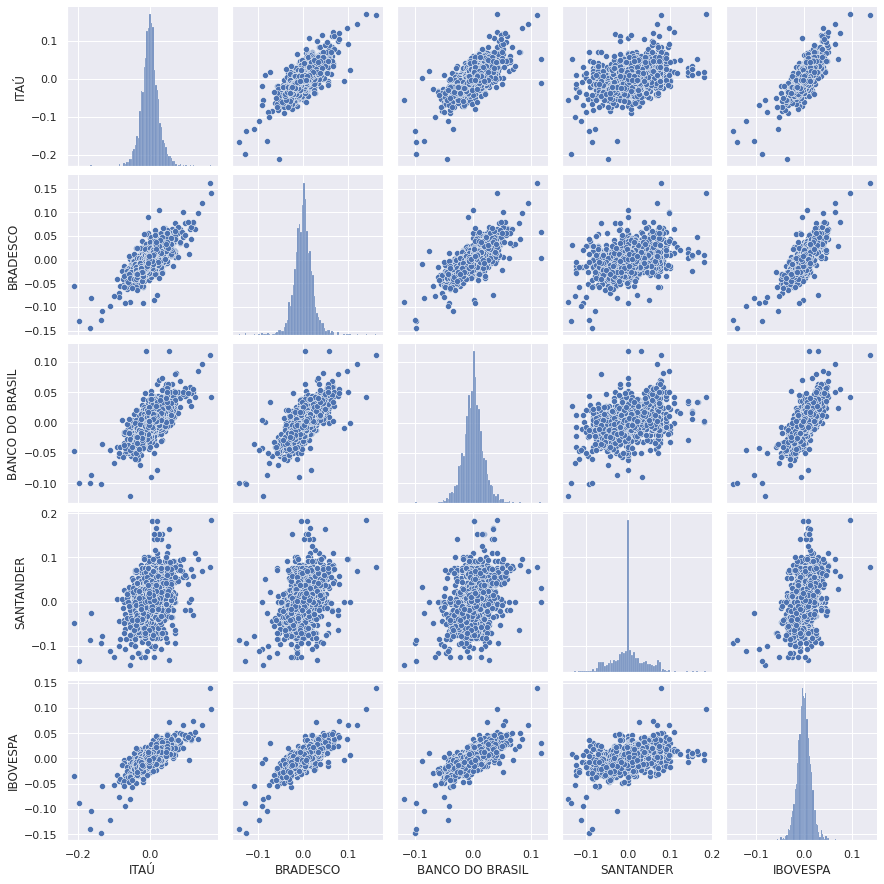

In [ ]:
sns.heatmap(portfolio.corr(), annot= True); # Estamos criando um mapa de correlação cm um annot = True para a demonstração de valores

# Também podemos criar correlações de Ativos como por exemplo:

retornos = portfolio.pct_change()[1:]

portfolio["ITAÚ"].rolling(252).corr(retornos["BRADESCO"]).plot(figsize=(22,8));

sns.pairplot(retornos);

Plotagem de Distribuição das Variações Diárias


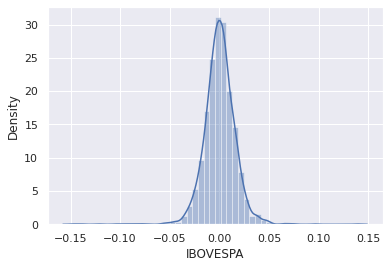

In [ ]:
sns.distplot(retornos['IBOVESPA'].dropna())  # Possível replicar em qualquer ativo apenas mudando a busca


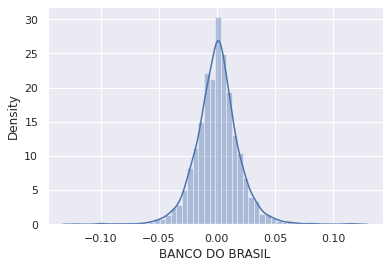

In [ ]:
sns.distplot(retornos['BANCO DO BRASIL'].dropna()) 

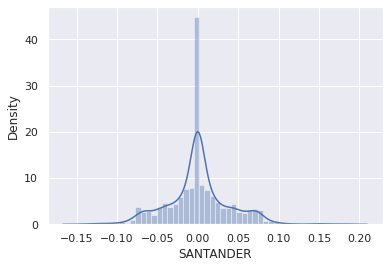

In [ ]:
sns.distplot(retornos['SANTANDER'].dropna()) 

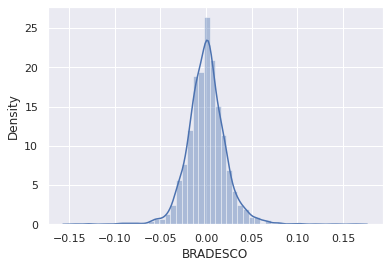

In [ ]:
sns.distplot(retornos['BRADESCO'].dropna()) 

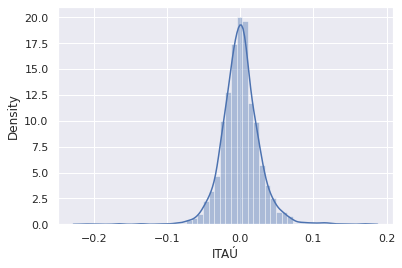

In [ ]:
sns.distplot(retornos['ITAÚ'].dropna()) 

Start date,2010-01-04
End date,2020-10-30
Total months,126
,Backtest
Annual return,2.531%
Cumulative returns,30.235%
Annual volatility,31.87%
Sharpe ratio,0.24
Calmar ratio,0.05
Stability,0.65
Max drawdown,-52.201%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,52.20,2020-01-02,2020-03-23,NaT,NaN
1,44.30,2014-09-02,2016-01-20,2016-10-14,554
2,38.40,2010-11-04,2011-08-08,2014-08-19,989
3,33.54,2018-02-26,2018-06-18,2018-11-28,198
4,20.64,2017-02-22,2017-06-23,2017-10-03,160


Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.32%,-9.94%,6.82%
Fukushima,0.06%,-1.72%,2.47%
EZB IR Event,-0.31%,-6.08%,2.94%
Flash Crash,0.47%,-2.11%,3.73%
Apr14,0.31%,-2.89%,5.08%
Oct14,0.13%,-4.60%,6.29%
Fall2015,-0.32%,-4.49%,5.41%
Recovery,0.01%,-9.94%,6.82%
New Normal,0.04%,-13.59%,13.12%


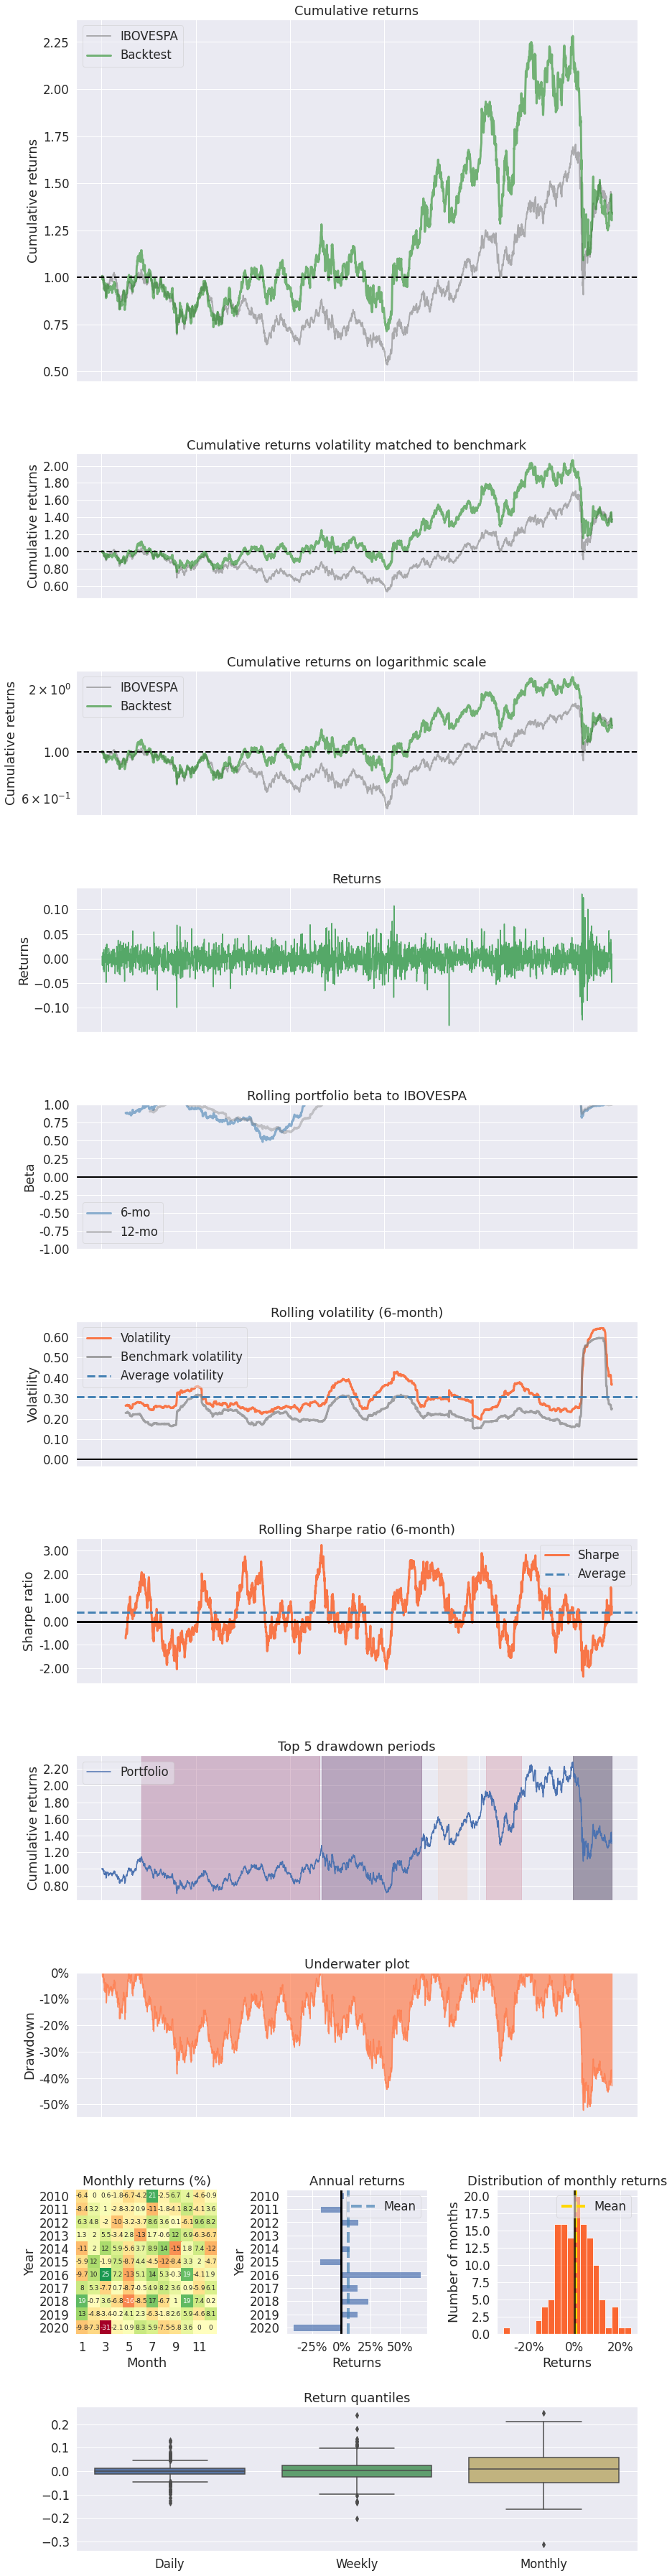

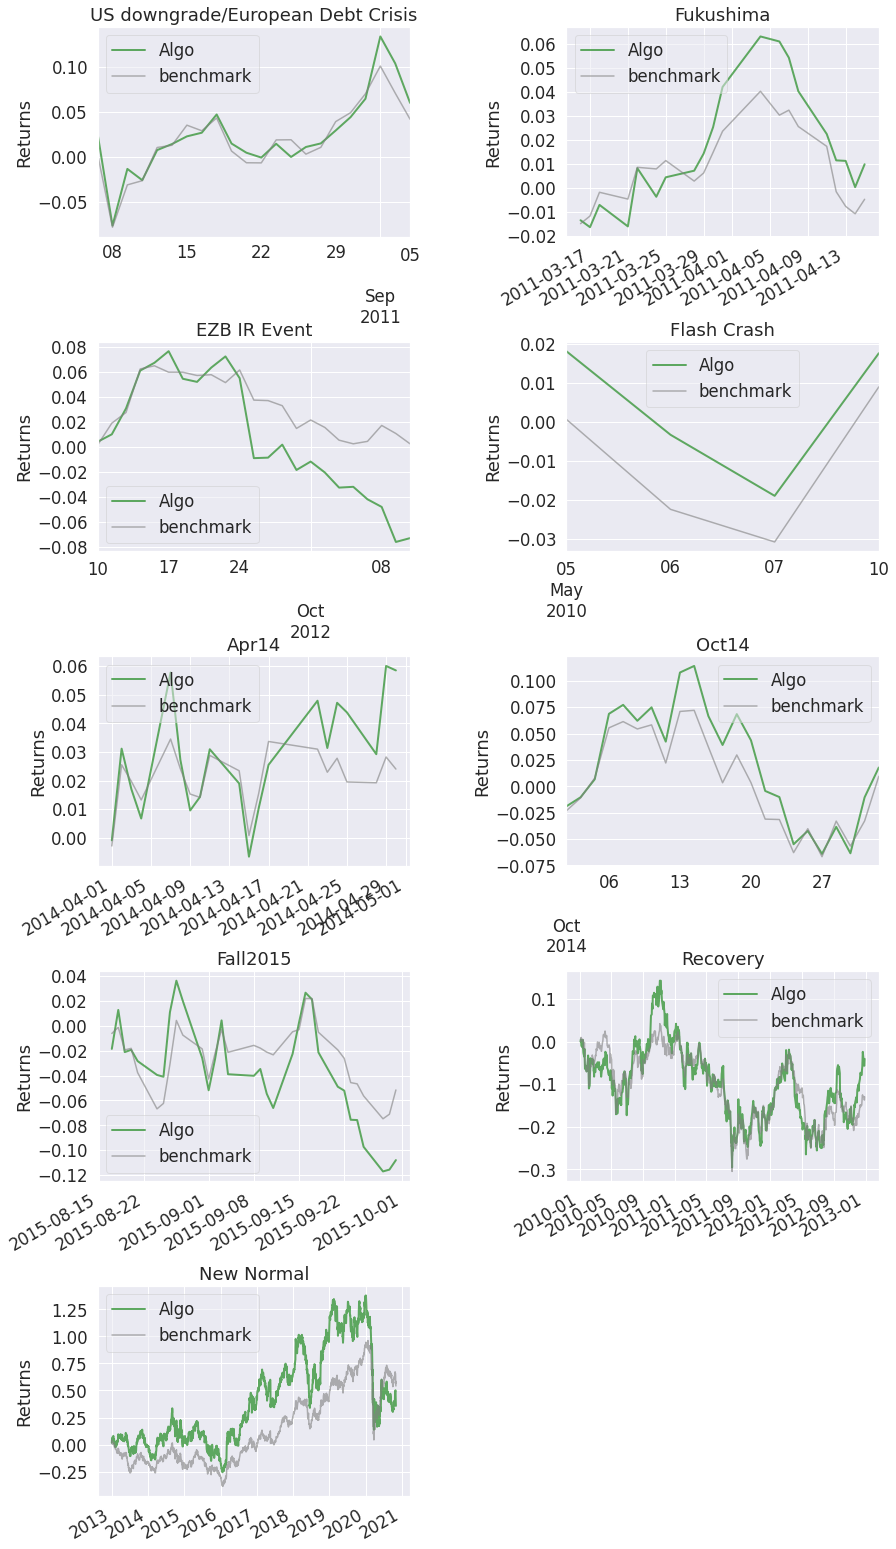

In [ ]:
retorno = portfolio.pct_change()   # Calculo do retorno diário de todos os ativos analisado de forma percentual
retorno

retorno_acumulado = (1 + retorno).cumprod()    # Analise do retorno acumulado desde o 1 dia. (Soma dos retorno somados com 1)
retorno_acumulado.iloc[0] = 1   # Necessário para a 1 linha começar com o número 1

carteira = 10000 * retorno_acumulado.iloc[:, :4]
carteira["saldo"] = carteira.sum(axis=1)  # Necessário para a soma na mesma linha
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["IBOVESPA"])